<a href="https://colab.research.google.com/github/krishna13052001/cnnworks/blob/main/housepredicitions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
import tensorflow as tf
from tensorflow import keras

In [ ]:
from sklearn.datasets import fetch_california_housing
data = fetch_california_housing()

In [ ]:
attributes = data.feature_names
attributes

['MedInc',
 'HouseAge',
 'AveRooms',
 'AveBedrms',
 'Population',
 'AveOccup',
 'Latitude',
 'Longitude']

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test ,y_train, y_test = train_test_split(data.data, data.target,random_state=42)
X_train, X_validate, y_train, y_validate = train_test_split(X_train,y_train,random_state=42)

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler =  StandardScaler()
X_train = scaler.fit_transform(X_train)
X_validate = scaler.fit_transform(X_validate)
X_test = scaler.fit_transform(X_test)

In [ ]:
np.random.seed(42)
tf.random.set_seed(42)

In [ ]:
X_train.shape

(11610, 8)

In [ ]:
model = keras.models.Sequential()
model.add(keras.layers.Dense(30, activation="relu",input_shape=[8]))
model.add(keras.layers.Dense(30, activation="relu"))
model.add(keras.layers.Dense(1))

In [ ]:
model.compile(loss="mean_squared_error", optimizer=keras.optimizers.SGD(lr=1e-3),metrics=['mae'])

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:375: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


In [ ]:
model_history = model.fit(X_train, y_train, epochs=20, validation_data=(X_validate, y_validate))

Epoch 1/20
363/363 [==============================] - 2s 2ms/step - loss: 1.8866 - mae: 0.9900 - val_loss: 0.7414 - val_mae: 0.6560
Epoch 2/20
363/363 [==============================] - 1s 2ms/step - loss: 0.6577 - mae: 0.6042 - val_loss: 0.6221 - val_mae: 0.5870
Epoch 3/20
363/363 [==============================] - 1s 2ms/step - loss: 0.5934 - mae: 0.5618 - val_loss: 0.5779 - val_mae: 0.5550
Epoch 4/20
363/363 [==============================] - 1s 2ms/step - loss: 0.5557 - mae: 0.5398 - val_loss: 0.5572 - val_mae: 0.5496
Epoch 5/20
363/363 [==============================] - 1s 1ms/step - loss: 0.5272 - mae: 0.5237 - val_loss: 0.5305 - val_mae: 0.5319
Epoch 6/20
363/363 [==============================] - 1s 1ms/step - loss: 0.5033 - mae: 0.5113 - val_loss: 0.5113 - val_mae: 0.5224
Epoch 7/20
363/363 [==============================] - 1s 2ms/step - loss: 0.4854 - mae: 0.5010 - val_loss: 0.4974 - val_mae: 0.5151
Epoch 8/20
363/363 [==============================] - 1s 2ms/step - loss: 0.

In [16]:
mae_test = model.fit(X_test, y_test)

162/162 [==============================] - 0s 1ms/step - loss: 0.3942 - mae: 0.4504


In [17]:
model_history.history

{'loss': [1.8866394758224487,
  0.6577127575874329,
  0.5934185981750488,
  0.5557191371917725,
  0.5271905064582825,
  0.5032976269721985,
  0.48535558581352234,
  0.47091808915138245,
  0.45779934525489807,
  0.4474469721317291,
  0.4393136501312256,
  0.43176087737083435,
  0.4260515868663788,
  0.42017653584480286,
  0.41549986600875854,
  0.4111650586128235,
  0.4077068567276001,
  0.40395283699035645,
  0.4004494547843933,
  0.3979603350162506],
 'mae': [0.9900256991386414,
  0.6041510701179504,
  0.5618005990982056,
  0.5398454070091248,
  0.5237294435501099,
  0.5112562775611877,
  0.5010153651237488,
  0.492448091506958,
  0.4857262372970581,
  0.4797375202178955,
  0.4744163453578949,
  0.4703480303287506,
  0.46740880608558655,
  0.46360209584236145,
  0.4612663984298706,
  0.4591343402862549,
  0.4568699896335602,
  0.45453643798828125,
  0.4521065056324005,
  0.45083147287368774],
 'val_loss': [0.7413728833198547,
  0.6220595836639404,
  0.5779172778129578,
  0.55718696117

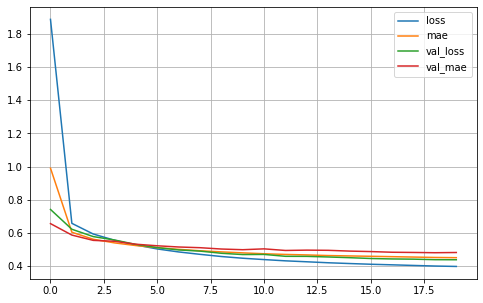

In [24]:
pd.DataFrame(model_history.history).plot(figsize=(8,5))
plt.grid(True)
# plt.gca().set_ylin(0,1)
plt.show()